# 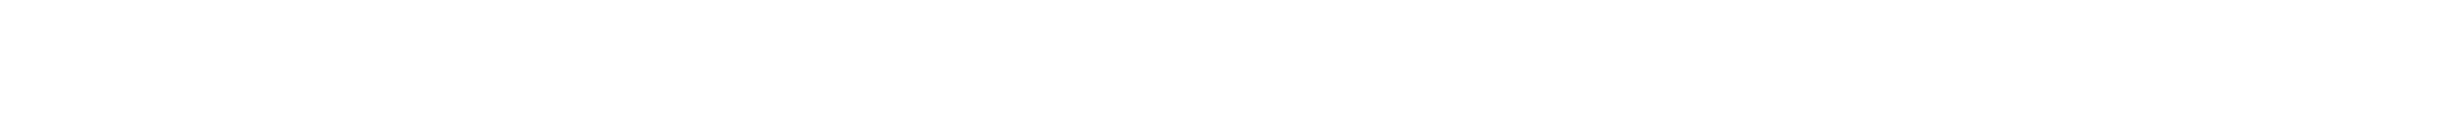

In [55]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy import stats
from scipy.stats import chi2_contingency 
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
sns.set_context("notebook")

In [56]:
df = pd.read_csv('Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx - hr_data.csv')

In [57]:
df.head()

,Username,EnterpriseID,StatusPernikahan,JenisKelamin,StatusKepegawaian,Pekerjaan,JenjangKarir,PerformancePegawai,AsalDaerah,HiringPlatform,...,NomorHP,Email,TingkatPendidikan,PernahBekerja,IkutProgramLOP,AlasanResign,TanggalLahir,TanggalHiring,TanggalPenilaianKaryawan,TanggalResign
0,spiritedPorpoise3,111065,Belum_menikah,Pria,Outsource,Software Engineer (Back End),Freshgraduate_program,Sangat_bagus,Jakarta Timur,Employee_Referral,...,+6282232522xxx,spiritedPorpoise3135@yahoo.com,Magister,1,1.0,masih_bekerja,1972-07-01,2011-01-10,2016-2-15,-
1,jealousGelding2,106080,Belum_menikah,Pria,FullTime,Data Analyst,Freshgraduate_program,Sangat_kurang,Jakarta Utara,Website,...,+6281270745xxx,jealousGelding2239@yahoo.com,Sarjana,1,1.0,toxic_culture,1984-04-26,2014-01-06,2020-1-17,2018-6-16
2,pluckyMuesli3,106452,Menikah,Pria,FullTime,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Timur,Indeed,...,+6281346215xxx,pluckyMuesli3961@icloud.com,Magister,1,1.0,jam_kerja,1974-01-07,2011-01-10,2016-01-10,2014-9-24
3,stressedTruffle1,106325,Belum_menikah,Pria,Outsource,Software Engineer (Front End),Freshgraduate_program,Bagus,Jakarta Pusat,LinkedIn,...,+6283233846xxx,stressedTruffle1406@hotmail.com,Sarjana,1,0.0,masih_bekerja,1979-11-24,2014-2-17,2020-02-04,-
4,shyTermite7,111171,Belum_menikah,Wanita,FullTime,Product Manager,Freshgraduate_program,Bagus,Jakarta Timur,LinkedIn,...,+6287883263xxx,shyTermite7149@gmail.com,Sarjana,1,0.0,ganti_karir,1974-11-07,2013-11-11,2020-1-22,2018-09-06


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [59]:
#taking summary of the dataset
def resumetable(df):
    print(f"Dataset Shape: {df.shape}") #print shape of the dataset
    summary = pd.DataFrame(df.dtypes,columns=['dtypes']) #print the datatype of each columns
    summary = summary.reset_index() # reset the index
    summary['Name'] = summary['index'] # change the column name from "index" to "Name"
    summary = summary[['Name','dtypes']] #reorder the column to 'Name' and 'dtypes'
    summary['Missing'] = df.isnull().sum().values #calculate the missing/nan from each columns
    summary['Uniques'] = df.nunique().values #calculate unique values from each columns
    summary['Sample Value'] = df.loc[0].values #show the sample of the columns
    
    for name in summary['Name'].value_counts().index:
    #this section is for calculate the entropy of each columns
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=10),2)
    return summary

In [60]:
resumetable(df)

Dataset Shape: (287, 25)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,Username,object,0,285,spiritedPorpoise3,2.45
1,EnterpriseID,int64,0,287,111065,2.46
2,StatusPernikahan,object,0,5,Belum_menikah,0.57
3,JenisKelamin,object,0,2,Pria,0.30
4,StatusKepegawaian,object,0,3,Outsource,0.26
5,Pekerjaan,object,0,14,Software Engineer (Back End),0.79
6,JenjangKarir,object,0,3,Freshgraduate_program,0.41
7,PerformancePegawai,object,0,5,Sangat_bagus,0.65
8,AsalDaerah,object,0,5,Jakarta Timur,0.69
9,HiringPlatform,object,0,9,Employee_Referral,0.78


terdapat 6 features yang memiliki missing value. untuk data yang memiliki lebih dari 70% missing value akan didrop, dan sisanya akan disisi dengan mean

In [61]:
df.drop(['IkutProgramLOP'], axis=1, inplace=True)


In [62]:
df[['AlasanResign']]= df[['AlasanResign']].fillna('masih_bekerja')
df[['SkorKepuasanPegawai']]= df[['SkorKepuasanPegawai']].fillna(df[['SkorKepuasanPegawai']].mean())
df[['JumlahKeikutsertaanProjek']]= df[['JumlahKeikutsertaanProjek']].fillna(df[['JumlahKeikutsertaanProjek']])
df[['JumlahKeterlambatanSebulanTerakhir']]= df[['JumlahKeterlambatanSebulanTerakhir']].fillna(df[['JumlahKeterlambatanSebulanTerakhir']])
df[['JumlahKetidakhadiran']]= df[['JumlahKetidakhadiran']].fillna(df[['JumlahKetidakhadiran']])


pada feature `PernahBekerja` terdapat 1 value yang tidak sesuai, maka kita akan merubah data tersebut ke data yang seharusnya. setelah itu kita akan merubah tipe datanya menjadi Int

In [63]:
df['PernahBekerja'].replace('yes', '1', inplace=True)

In [67]:
df['PernahBekerja']=  df['PernahBekerja'].astype(int)

In [69]:
resumetable(df)

Dataset Shape: (287, 24)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,Username,object,0,285,spiritedPorpoise3,2.45
1,EnterpriseID,int64,0,287,111065,2.46
2,StatusPernikahan,object,0,5,Belum_menikah,0.57
3,JenisKelamin,object,0,2,Pria,0.30
4,StatusKepegawaian,object,0,3,Outsource,0.26
5,Pekerjaan,object,0,14,Software Engineer (Back End),0.79
6,JenjangKarir,object,0,3,Freshgraduate_program,0.41
7,PerformancePegawai,object,0,5,Sangat_bagus,0.65
8,AsalDaerah,object,0,5,Jakarta Timur,0.69
9,HiringPlatform,object,0,9,Employee_Referral,0.78


kita akan membuang data yang memiliki 1 unique value dan data yang terlalu banyak unique value. feature yang memiliki 1 unique Value adalah `PernahBekerja` dan features yang memiliki banyak unique value adalah `Username`, `EnterpriseID`, `NomorHP`, `Email`

In [70]:
df.drop(['PernahBekerja'], axis=1, inplace=True)
df.drop(['Username'], axis=1, inplace=True)
df.drop(['EnterpriseID'], axis=1, inplace=True)
df.drop(['NomorHP'], axis=1, inplace=True)
df.drop(['Email'], axis=1, inplace=True)


In [71]:
resumetable(df)

Dataset Shape: (287, 19)


,Name,dtypes,Missing,Uniques,Sample Value,Entropy
0,StatusPernikahan,object,0,5,Belum_menikah,0.57
1,JenisKelamin,object,0,2,Pria,0.30
2,StatusKepegawaian,object,0,3,Outsource,0.26
3,Pekerjaan,object,0,14,Software Engineer (Back End),0.79
4,JenjangKarir,object,0,3,Freshgraduate_program,0.41
5,PerformancePegawai,object,0,5,Sangat_bagus,0.65
6,AsalDaerah,object,0,5,Jakarta Timur,0.69
7,HiringPlatform,object,0,9,Employee_Referral,0.78
8,SkorSurveyEngagement,int64,0,5,4,0.52
9,SkorKepuasanPegawai,float64,0,6,4.0,0.56
